<a href="https://colab.research.google.com/github/edu510/IMT_CD_PROJETO_S1_RelacaoSaudeEconomia/blob/main/IMT_Projeto_Template_S1_Rela%C3%A7%C3%A3o_entre_Sa%C3%BAde_e_Economia_OFICIAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/Rogerio-mack/IMT_CD_2024/blob/main/maua_logo.png?raw=true" width=300, align="right">



# **Exploratory Data Analysis (EDA)**
# **Análise Exploratória de Dados: Relação entre Saúde e Economia**


In [ ]:
#@title **Identificação do Grupo**

#@markdown Nomes completos em ordem alfabética (*\<nome\>, \<RA\>*)
Aluno1 = 'Raphael Fernandes Raymundo, 21003343' #@param {type:"string"}
Aluno2 = 'Nicole Martins Fragnan, 21003688' #@param {type:"string"}
Aluno3 = 'Eduardo Lucas Felippa, 20019130' #@param {type:"string"}
Aluno4 = 'Kaiven Yang Su, 20021460' #@param {type:"string"}
Aluno5 = 'Felipe Rodrigues Peixoto da Silva, 21001278' #@param {type:"string"}





# *Resumo*

Este notebook conduz uma análise exploratória que integra dados do Banco Mundial e da OMS para investigar a relação entre indicadores econômicos (PIB per capita, crescimento do PIB e inflação) e de saúde (gastos em saúde, mortalidade infantil e expectativa de vida) em cinco países (Brasil, EUA, Alemanha, Japão e África do Sul) de 2000 a 2022. Após coletar, limpar e organizar as bases, foram calculadas estatísticas descritivas, plotadas séries temporais e matrizes de correlação, evidenciando forte associação positiva entre PIB per capita e gastos em saúde, bem como correlação negativa entre renda e mortalidade infantil. Testes estatísticos (t de Welch e Mann–Whitney U) confirmaram que países com PIB ou gastos em saúde acima da mediana apresentam significativamente menores taxas de mortalidade infantil. As análises enfrentam limitações de amostragem e dependência temporal dos dados anuais, mas apontam que o desenvolvimento econômico e a alocação eficaz de recursos em saúde são essenciais para reduzir desfechos adversos, subsidiando políticas públicas voltadas ao fortalecimento dos sistemas de saúde, sobretudo em economias de renda média.

# *Abstract*

This notebook performs an exploratory analysis combining World Bank and WHO data to examine the relationship between economic indicators (GDP per capita, GDP growth, and inflation) and health metrics (health expenditure, infant mortality, and life expectancy) for five countries (Brazil, USA, Germany, Japan, and South Africa) from 2000 to 2022. After data collection, cleaning, and integration, descriptive statistics, time-series plots, and correlation matrices reveal a strong positive association between GDP per capita and health spending, as well as a negative correlation between income and infant mortality. Statistical tests (Welch’s t-test and Mann–Whitney U) confirm that countries above the median in GDP or health spending exhibit significantly lower infant mortality rates. Although constrained by a limited country sample and temporal dependencies in annual data, the findings underscore that both economic development and effective health resource allocation are crucial for improving health outcomes, providing evidence to inform public policies aimed at strengthening health systems, especially in middle-income economies.


## Introdução

Este notebook apresenta uma análise exploratória completa da relação entre indicadores de saúde e economia, utilizando dados de fontes primárias. O objetivo é investigar como os indicadores econômicos se relacionam com os indicadores de saúde em diferentes países, buscando identificar padrões, correlações e insights relevantes.

### Contexto

A relação entre economia e saúde é um tema de grande relevância para políticas públicas e desenvolvimento social. Países com diferentes níveis de desenvolvimento econômico apresentam variações significativas em seus indicadores de saúde, e compreender essas relações pode fornecer insights valiosos para tomadores de decisão.

### Objetivos

1. Analisar a correlação entre indicadores econômicos (PIB per capita, crescimento econômico, inflação) e indicadores de saúde (gastos com saúde, mortalidade infantil, expectativa de vida)
2. Investigar como os gastos com saúde variam em relação ao PIB em diferentes países
3. Testar hipóteses sobre a relação entre desenvolvimento econômico e resultados de saúde
4. Analisar tendências temporais nos indicadores de saúde e economia

# **Descrição e origem dos dados**
Para esta análise exploratória, utilizamos dados de duas fontes primárias  oficiais:

- **Banco Mundial (World Bank – Indicadores de Desenvolvimento Mundial)**  
  - **API**: https://api.worldbank.org/v2/  
  - Indicadores econômicos selecionados:  
    - PIB per capita (US$, código `NY.GDP.PCAP.CD`)  
    - Crescimento do PIB (% anual, código `NY.GDP.MKTP.KD.ZG`)  
    - Inflação anual (% variação do índice de preços ao consumidor, código `FP. CPI.TOTL.ZG`)  
  - Indicadores de saúde (disponíveis também no Banco Mundial):  
    - Gastos com saúde (% do PIB, código `SH.XPD.CHEX.GD.ZS`)  
    - Gastos com saúde per capita (US$, código `SH.XPD.CHEX.PC.CD`)  
    - Taxa de mortalidade infantil (por 1.000 nascidos vivos, código `SH.DYN. MORT`)  
  - Os dados do Banco Mundial são coletados diretamente de agências nacionais   (bancos centrais, institutos de estatística, ministérios).

- **Organização Mundial da Saúde (OMS – Global Health Observatory)**  
  - **API OData**: https://ghoapi.azureedge.net/api/  
  - Indicadores de saúde adicionais:  
    - Expectativa de vida ao nascer (código `WHOSIS_000001`)  
    - Taxa de mortalidade infantil (MDG, código `MDG_0000000001`)  
    - Proteção financeira em saúde (percentual da população sem catástrofe de   gastos, código `FINPROTECTION_CATA_TOT_10_POP`)  
  - A OMS consolida dados de sistemas nacionais de saúde, levantamentos   populacionais e registros administrativos.


In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import requests
import json
import scipy.stats as stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Configurações de visualização
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
warnings.filterwarnings('ignore')

# Configurar diretório para salvar dados
data_dir = "data"
os.makedirs(data_dir, exist_ok=True)

print("Ambiente configurado com sucesso!")

Ambiente configurado com sucesso!


# **Aquisição e Preparação dos dados**

Abaixo, apresentamos o código utilizado para baixar, limpar e agrupar os dados do Banco Mundial e da OMS. Também justificamos as seleções realizadas.





# Coleta de Dados do Word Bank

In [ ]:
# Função para buscar indicadores do Banco Mundial
def buscar_indicadores_banco_mundial(termo_busca, per_page=50):
    """Busca indicadores no Banco Mundial com base em um termo de busca."""
    url = f"https://api.worldbank.org/v2/indicator?format=json&per_page={per_page}&search={termo_busca}"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        print(f"Encontrados {data[0]['total']} indicadores para o termo '{termo_busca}'")
        return data[1]  # A resposta contém [metadata, data]
    else:
        print(f"Erro ao buscar indicadores: {response.status_code}")
        return []

# Função para obter dados de um indicador para países
def obter_dados_indicador_banco_mundial(codigo_indicador, paises=None):
    """Obtém dados de um indicador específico para países selecionados."""
    if paises is None:
        paises = ["BRA", "USA", "DEU", "JPN", "ZAF"]

    paises_str = ";".join(paises)
    url = f"https://api.worldbank.org/v2/country/{paises_str}/indicator/{codigo_indicador}?format=json&per_page=1000"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        if len(data) > 1:
            print(f"Obtidos {data[0]['total']} registros para o indicador {codigo_indicador}")
            return data[1]  # A resposta contém [metadata, data]
        else:
            print(f"Nenhum dado encontrado para o indicador {codigo_indicador}")
            return []
    else:
        print(f"Erro ao obter dados do indicador: {response.status_code}")
        return []

# Função para criar DataFrame a partir dos dados da API do Banco Mundial
def criar_df_do_indicador_banco_mundial(dados_indicador):
    """Converte dados de indicador do Banco Mundial em DataFrame."""
    registros = []

    for item in dados_indicador:
        if item['value'] is not None:  # Ignorar valores nulos
            registros.append({
                'Pais': item['country']['value'],
                'Codigo_Pais': item['countryiso3code'],
                'Indicador': item['indicator']['value'],
                'Codigo_Indicador': item['indicator']['id'],
                'Ano': item['date'],
                'Valor': item['value']
            })

    # Criar DataFrame
    df = pd.DataFrame(registros)

    return df

# Lista de países para análise (códigos ISO de 3 letras)
paises = ["BRA", "USA", "DEU", "JPN", "ZAF"]
nomes_paises = {
    'BRA': 'Brasil',
    'USA': 'Estados Unidos',
    'DEU': 'Alemanha',
    'JPN': 'Japão',
    'ZAF': 'África do Sul'
}

# Indicadores econômicos selecionados
indicadores_economicos_selecionados = {
    'NY.GDP.PCAP.CD': 'PIB per capita (US$)',
    'NY.GDP.MKTP.KD.ZG': 'Crescimento do PIB (%)',
    'FP.CPI.TOTL.ZG': 'Inflação (%)'
}

# Indicadores de saúde selecionados
indicadores_saude_selecionados = {
    'SH.XPD.CHEX.GD.ZS': 'Gastos com saúde (% do PIB)',
    'SH.XPD.CHEX.PC.CD': 'Gastos com saúde per capita (US$)',
    'SH.DYN.MORT': 'Taxa de mortalidade infantil'
}

# Baixar dados para cada indicador
print("Baixando dados do Banco Mundial...")

# Listas para armazenar DataFrames
dfs_economicos = []
dfs_saude_bm = []

# Baixar dados econômicos
for codigo_indicador, nome_indicador in indicadores_economicos_selecionados.items():
    try:
        dados = obter_dados_indicador_banco_mundial(codigo_indicador, paises)
        if dados:
            df = criar_df_do_indicador_banco_mundial(dados)
            dfs_economicos.append(df)
            print(f"Dados econômicos obtidos: {nome_indicador}")
    except Exception as e:
        print(f"Erro ao obter dados econômicos para {codigo_indicador}: {e}")

# Baixar dados de saúde
for codigo_indicador, nome_indicador in indicadores_saude_selecionados.items():
    try:
        dados = obter_dados_indicador_banco_mundial(codigo_indicador, paises)
        if dados:
            df = criar_df_do_indicador_banco_mundial(dados)
            dfs_saude_bm.append(df)
            print(f"Dados de saúde obtidos: {nome_indicador}")
    except Exception as e:
        print(f"Erro ao obter dados de saúde para {codigo_indicador}: {e}")

# Combinar todos os DataFrames
df_economicos = pd.concat(dfs_economicos, ignore_index=True) if dfs_economicos else pd.DataFrame()
df_saude_bm = pd.concat(dfs_saude_bm, ignore_index=True) if dfs_saude_bm else pd.DataFrame()

# Salvar dados em CSV (opcional, para referência)
if not df_economicos.empty:
    caminho_economicos = os.path.join(data_dir, "indicadores_economicos.csv")
    df_economicos.to_csv(caminho_economicos, index=False)
    print(f"Dados econômicos salvos em: {caminho_economicos}")

if not df_saude_bm.empty:
    caminho_saude = os.path.join(data_dir, "indicadores_saude.csv")
    df_saude_bm.to_csv(caminho_saude, index=False)
    print(f"Dados de saúde salvos em: {caminho_saude}")



Baixando dados do Banco Mundial...
Obtidos 325 registros para o indicador NY.GDP.PCAP.CD
Dados econômicos obtidos: PIB per capita (US$)
Obtidos 325 registros para o indicador NY.GDP.MKTP.KD.ZG
Dados econômicos obtidos: Crescimento do PIB (%)
Obtidos 325 registros para o indicador FP.CPI.TOTL.ZG
Dados econômicos obtidos: Inflação (%)
Obtidos 325 registros para o indicador SH.XPD.CHEX.GD.ZS
Dados de saúde obtidos: Gastos com saúde (% do PIB)
Obtidos 325 registros para o indicador SH.XPD.CHEX.PC.CD
Dados de saúde obtidos: Gastos com saúde per capita (US$)
Obtidos 325 registros para o indicador SH.DYN.MORT
Dados de saúde obtidos: Taxa de mortalidade infantil
Dados econômicos salvos em: data/indicadores_economicos.csv
Dados de saúde salvos em: data/indicadores_saude.csv


## Coleta de Dados da OMS

In [ ]:
# Função para obter dados da OMS via API OData
def obter_dados_oms_odata(codigo_indicador, formato="json"):
    """Obtém dados da OMS para um indicador específico via API OData."""
    url = f"https://ghoapi.azureedge.net/api/{codigo_indicador}"

    headers = {
        "Accept": f"application/{formato}"
    }

    print(f"Baixando dados da OMS para o indicador: {codigo_indicador}...")
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        if formato == "json":
            data = response.json()
            print(f"Dados obtidos com sucesso: {len(data['value'])} registros")
            return data['value']
        else:
            print("Dados obtidos com sucesso")
            return response.content
    else:
        print(f"Erro ao baixar dados: {response.status_code}")
        return None

# Função para salvar dados da OMS em CSV
def salvar_dados_oms_csv(dados, nome_arquivo):
    """Converte dados da OMS em DataFrame e salva como CSV."""
    if not dados:
        print(f"Sem dados para salvar em {nome_arquivo}")
        return None

    # Criar DataFrame
    df = pd.DataFrame(dados)

    # Salvar em CSV
    caminho_arquivo = os.path.join(data_dir, nome_arquivo)
    df.to_csv(caminho_arquivo, index=False)
    print(f"Dados salvos em: {caminho_arquivo}")

    return caminho_arquivo

# Indicadores da OMS para baixar
indicadores_oms = {
    "WHOSIS_000001": "expectativa_vida_oms.csv",  # Expectativa de vida ao nascer
    "MDG_0000000001": "mortalidade_infantil_oms.csv",  # Taxa de mortalidade infantil
    "FINPROTECTION_CATA_TOT_10_POP": "protecao_financeira_saude_oms.csv"  # Proteção financeira em saúde
}

# Baixar dados da OMS e carregar em DataFrames
dfs_oms = {}
for codigo, nome_arquivo in indicadores_oms.items():
    dados = obter_dados_oms_odata(codigo)
    if dados:
        arquivo = salvar_dados_oms_csv(dados, nome_arquivo)
        if arquivo:
            dfs_oms[nome_arquivo.split(".")[0]] = pd.read_csv(arquivo)

# Atribuir DataFrames a variáveis
df_expectativa_vida = dfs_oms.get("expectativa_vida_oms")
df_mortalidade = dfs_oms.get("mortalidade_infantil_oms")
df_protecao_financeira = dfs_oms.get("protecao_financeira_saude_oms")

Baixando dados da OMS para o indicador: WHOSIS_000001...
Dados obtidos com sucesso: 12936 registros
Dados salvos em: data/expectativa_vida_oms.csv
Baixando dados da OMS para o indicador: MDG_0000000001...
Dados obtidos com sucesso: 43513 registros
Dados salvos em: data/mortalidade_infantil_oms.csv
Baixando dados da OMS para o indicador: FINPROTECTION_CATA_TOT_10_POP...
Dados obtidos com sucesso: 6338 registros
Dados salvos em: data/protecao_financeira_saude_oms.csv


## Limpeza e Preparação dos Dados
Vamos explorar a estrutura dos dados coletados e realizar a limpeza necessária para nossa análise.

In [ ]:
# Verificar estrutura dos dados do Banco Mundial
print("=== Estrutura dos Dados do Banco Mundial ===")
print("\nDados Econômicos:")
print(df_economicos.info())
print("\nDados de Saúde:")
print(df_saude_bm.info())

# Verificar estrutura dos dados da OMS
print("\n=== Estrutura dos Dados da OMS ===")
print("\nExpectativa de Vida:")
print(df_expectativa_vida.info())
print("\nMortalidade Infantil:")
print(df_mortalidade.info())
print("\nProteção Financeira em Saúde:")
print(df_protecao_financeira.info())

=== Estrutura dos Dados do Banco Mundial ===

Dados Econômicos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pais              939 non-null    object 
 1   Codigo_Pais       939 non-null    object 
 2   Indicador         939 non-null    object 
 3   Codigo_Indicador  939 non-null    object 
 4   Ano               939 non-null    object 
 5   Valor             939 non-null    float64
dtypes: float64(1), object(5)
memory usage: 44.1+ KB
None

Dados de Saúde:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pais              530 non-null    object 
 1   Codigo_Pais       530 non-null    object 
 2   Indicador         530 non-null    object 
 3   Codigo_Indicador  530 non-null    obj

### Limpeza dos Dados do Banco Mundial

Vamos limpar e padronizar os dados do Banco Mundial para facilitar nossa análise.

In [ ]:
# Função para limpar e padronizar dados do Banco Mundial
def limpar_dados_banco_mundial(df):
    """Limpa e padroniza os dados do Banco Mundial."""
    # Renomear colunas
    df = df.rename(columns={
        'Pais': 'Pais',
        'Codigo_Pais': 'Codigo_Pais',
        'Indicador': 'Nome_Indicador',
        'Codigo_Indicador': 'Codigo_Indicador',
        'Ano': 'Ano',
        'Valor': 'Valor'
    })

    # Converter ano para inteiro
    df['Ano'] = df['Ano'].astype(int)

    # Remover linhas com valores nulos
    df = df.dropna(subset=['Valor'])

    # Ordenar por país e ano
    df = df.sort_values(['Pais', 'Ano'])

    return df

# Limpar dados econômicos e de saúde do Banco Mundial
df_economicos_limpo = limpar_dados_banco_mundial(df_economicos)
df_saude_bm_limpo = limpar_dados_banco_mundial(df_saude_bm)

print("=== Dados do Banco Mundial após limpeza ===")
print(f"Dados Econômicos: {df_economicos_limpo.shape}")
print(f"Dados de Saúde: {df_saude_bm_limpo.shape}")

=== Dados do Banco Mundial após limpeza ===
Dados Econômicos: (939, 6)
Dados de Saúde: (530, 6)


### Limpeza dos Dados da OMS

Agora, vamos limpar e padronizar os dados da OMS.

In [ ]:
# Função para limpar e padronizar dados da OMS
def limpar_dados_oms(df, nome_indicador):
    """Limpa e padroniza os dados da OMS."""
    # Selecionar colunas relevantes
    colunas_relevantes = ['SpatialDim', 'TimeDim', 'Dim1', 'Dim1Type', 'Dim2', 'Dim2Type', 'Value', 'NumericValue']

    # Verificar quais colunas existem no DataFrame
    colunas_existentes = [col for col in colunas_relevantes if col in df.columns]

    # Selecionar apenas as colunas existentes
    df_limpo = df[colunas_existentes].copy()

    # Renomear colunas
    mapeamento_colunas = {
        'SpatialDim': 'Codigo_Pais',
        'TimeDim': 'Ano',
        'Value': 'Valor_Texto',
        'NumericValue': 'Valor'
    }

    # Aplicar renomeação apenas para colunas que existem
    renomear = {k: v for k, v in mapeamento_colunas.items() if k in df_limpo.columns}
    df_limpo = df_limpo.rename(columns=renomear)

    # Adicionar coluna de nome do indicador
    df_limpo['Nome_Indicador'] = nome_indicador

    # Converter ano para inteiro se possível
    if 'Ano' in df_limpo.columns:
        df_limpo['Ano'] = pd.to_numeric(df_limpo['Ano'], errors='coerce')
        df_limpo = df_limpo.dropna(subset=['Ano'])
        df_limpo['Ano'] = df_limpo['Ano'].astype(int)

    # Remover linhas com valores nulos
    if 'Valor' in df_limpo.columns:
        df_limpo = df_limpo.dropna(subset=['Valor'])

    # Ordenar por país e ano
    if 'Codigo_Pais' in df_limpo.columns and 'Ano' in df_limpo.columns:
        df_limpo = df_limpo.sort_values(['Codigo_Pais', 'Ano'])

    return df_limpo

# Limpar dados da OMS
df_expectativa_vida_limpo = limpar_dados_oms(df_expectativa_vida, "Expectativa de Vida ao Nascer")
df_mortalidade_limpo = limpar_dados_oms(df_mortalidade, "Taxa de Mortalidade Infantil")
df_protecao_financeira_limpo = limpar_dados_oms(df_protecao_financeira, "Proteção Financeira em Saúde")

print("\n=== Dados da OMS após limpeza ===")
print(f"Expectativa de Vida: {df_expectativa_vida_limpo.shape}")
print(f"Mortalidade Infantil: {df_mortalidade_limpo.shape}")
print(f"Proteção Financeira: {df_protecao_financeira_limpo.shape}")


=== Dados da OMS após limpeza ===
Expectativa de Vida: (12936, 9)
Mortalidade Infantil: (43513, 9)
Proteção Financeira: (6338, 9)


## Preparação dos Dados para Análise
Vamos criar um DataFrame combinado para facilitar nossa análise.

In [ ]:
# Função para criar DataFrame pivotado por país, ano e indicador
def criar_df_pivotado(df, valor_coluna='Valor'):
    """Cria um DataFrame pivotado por país, ano e indicador."""
    if 'Codigo_Indicador' in df.columns:
        df_pivot = df.pivot_table(
            index=['Pais', 'Codigo_Pais', 'Ano'],
            columns='Codigo_Indicador',
            values=valor_coluna
        ).reset_index()
    else:
        df_pivot = df.pivot_table(
            index=['Codigo_Pais', 'Ano'],
            columns='Nome_Indicador',
            values=valor_coluna
        ).reset_index()

    return df_pivot

# Criar DataFrames pivotados para dados do Banco Mundial
df_economicos_pivot = criar_df_pivotado(df_economicos_limpo)
df_saude_bm_pivot = criar_df_pivotado(df_saude_bm_limpo)

# Mesclar dados econômicos e de saúde do Banco Mundial
df_banco_mundial = pd.merge(
    df_economicos_pivot,
    df_saude_bm_pivot,
    on=['Pais', 'Codigo_Pais', 'Ano'],
    how='inner'
)

# Renomear colunas para melhor interpretação
mapeamento_colunas_bm = {
    'NY.GDP.PCAP.CD': 'PIB_per_capita',
    'NY.GDP.MKTP.KD.ZG': 'Crescimento_PIB',
    'FP.CPI.TOTL.ZG': 'Inflacao',
    'SH.XPD.CHEX.GD.ZS': 'Gastos_Saude_PIB',
    'SH.XPD.CHEX.PC.CD': 'Gastos_Saude_per_capita',
    'SH.DYN.MORT': 'Mortalidade_Infantil_BM'
}

df_banco_mundial = df_banco_mundial.rename(columns=mapeamento_colunas_bm)

# Salvar DataFrame combinado
df_banco_mundial.to_csv(os.path.join(data_dir, 'dados_combinados_banco_mundial.csv'), index=False)

print("\n=== DataFrame Combinado do Banco Mundial ===")
print(df_banco_mundial.head())
print(f"Dimensões: {df_banco_mundial.shape}")


=== DataFrame Combinado do Banco Mundial ===
Codigo_Indicador    Pais Codigo_Pais   Ano  Inflacao  Crescimento_PIB  \
0                 Brazil         BRA  1960       NaN              NaN   
1                 Brazil         BRA  1961       NaN              8.6   
2                 Brazil         BRA  1962       NaN              6.6   
3                 Brazil         BRA  1963       NaN              0.6   
4                 Brazil         BRA  1964       NaN              3.4   

Codigo_Indicador  PIB_per_capita  Mortalidade_Infantil_BM  Gastos_Saude_PIB  \
0                     235.266010                    169.4               NaN   
1                     231.564063                    164.7               NaN   
2                     250.200573                    160.3               NaN   
3                     294.169619                    156.1               NaN   
4                     257.259727                    152.2               NaN   

Codigo_Indicador  Gastos_Saude_per_capit

## Justificativas das seleções e reduções realizadas

- **Países escolhidos**: optamos por cinco países que representam diferentes níveis de desenvolvimento econômico (alto, médio-alto, médio-baixo).

- **Período (2000–2022)**: garante que todos os países selecionados tenham cobertura de dados consistente, evitando lacunas ou inconsistências anteriores a 2000.

- **Indicadores específicos**: focamos em PIB per capita, crescimento do PIB, inflação, gastos em saúde (absoluto e relativo) e mortalidade infantil, pois são variáveis-chave que permitem avaliar a relação entre riqueza econômica e resultados de saúde.

- **Limpeza**: descartamos registros sem valor (`value = None`) e mantivemos apenas registros com valores numéricos para garantir consistência nos cálculos estatísticos posteriores.


# **Análises**

A seguir, investigamos seis perguntas orientadas pelos dados. Para cada pergunta, apresentamos o código em Python, as visualizações geradas e as interpretações.


## Análise Estatística Descritiva
Vamos realizar uma análise estatística descritiva dos indicadores econômicos e de saúde.

In [ ]:
# Selecionar indicadores econômicos
indicadores_economicos = ['PIB_per_capita', 'Crescimento_PIB', 'Inflacao']

# Calcular estatísticas descritivas
estatisticas_economicas = df_banco_mundial[indicadores_economicos].describe()

print("=== Estatísticas Descritivas dos Indicadores Econômicos ===")
print(estatisticas_economicas)

=== Estatísticas Descritivas dos Indicadores Econômicos ===
Codigo_Indicador  PIB_per_capita  Crescimento_PIB     Inflacao
count                 298.000000       295.000000   277.000000
mean                17826.341578         2.949302    46.210045
std                 18259.679476         3.168711   268.333463
min                   231.564063        -6.168918    -1.352837
25%                  3207.333370         1.099913     1.732169
50%                  8974.166326         2.795606     3.989848
75%                 32845.452857         4.569175     6.872574
max                 82769.412211        13.968722  2947.732772


In [ ]:
# Selecionar indicadores de saúde
indicadores_saude = ['Gastos_Saude_PIB', 'Gastos_Saude_per_capita', 'Mortalidade_Infantil_BM']

# Calcular estatísticas descritivas
estatisticas_saude = df_banco_mundial[indicadores_saude].describe()

print("\n=== Estatísticas Descritivas dos Indicadores de Saúde ===")
print(estatisticas_saude)


=== Estatísticas Descritivas dos Indicadores de Saúde ===
Codigo_Indicador  Gastos_Saude_PIB  Gastos_Saude_per_capita  \
count                   116.000000               116.000000   
mean                     10.484694              3536.989888   
std                       3.034821              3081.756793   
min                       6.677745               179.513550   
25%                       8.048631               640.229172   
50%                       9.904563              3188.042603   
75%                      11.434664              5135.598145   
max                      18.813253             12434.433594   

Codigo_Indicador  Mortalidade_Infantil_BM  
count                          298.000000  
mean                            32.919799  
std                             37.973248  
min                              2.400000  
25%                              6.800000  
50%                             16.000000  
75%                             44.150000  
max                  

### Análise de Tendências ao Longo do Tempo

Vamos analisar as tendências dos indicadores ao longo do tempo, focando no Brasil como exemplo.

In [ ]:
# Selecionar dados do Brasil para análise de tendências
df_brasil = df_banco_mundial[df_banco_mundial['Codigo_Pais'] == 'BRA'].copy()

print("=== Dados do Brasil ao Longo do Tempo ===")
print(df_brasil[['Ano'] + indicadores_economicos + indicadores_saude].sort_values('Ano', ascending=False).head(10))

=== Dados do Brasil ao Longo do Tempo ===
Codigo_Indicador   Ano  PIB_per_capita  Crescimento_PIB  Inflacao  \
63                2023    10294.866681         2.908480  4.593563   
62                2022     9281.333344         3.016694  9.280106   
61                2021     7972.536650         4.762604  8.301660   
60                2020     7074.193783        -3.276759  3.211768   
59                2019     9029.833267         1.220778  3.732976   
58                2018     9300.661649         1.783667  3.664850   
57                2017    10080.509282         1.322869  3.446373   
56                2016     8836.286526        -3.275917  8.739144   
55                2015     8936.196618        -3.545763  9.029901   
54                2014    12274.993969         0.503956  6.329040   

Codigo_Indicador  Gastos_Saude_PIB  Gastos_Saude_per_capita  \
63                             NaN                      NaN   
62                        9.142775               848.571228   
61       

## **Q1. Pergunta 1.** Como evoluiu o PIB per capita (2000–2022) para os países analisados?  
Para responder, plotamos a série temporal de `PIB_per_capita` para Brasil, Estados Unidos, Alemanha, Japão e África do Sul.  

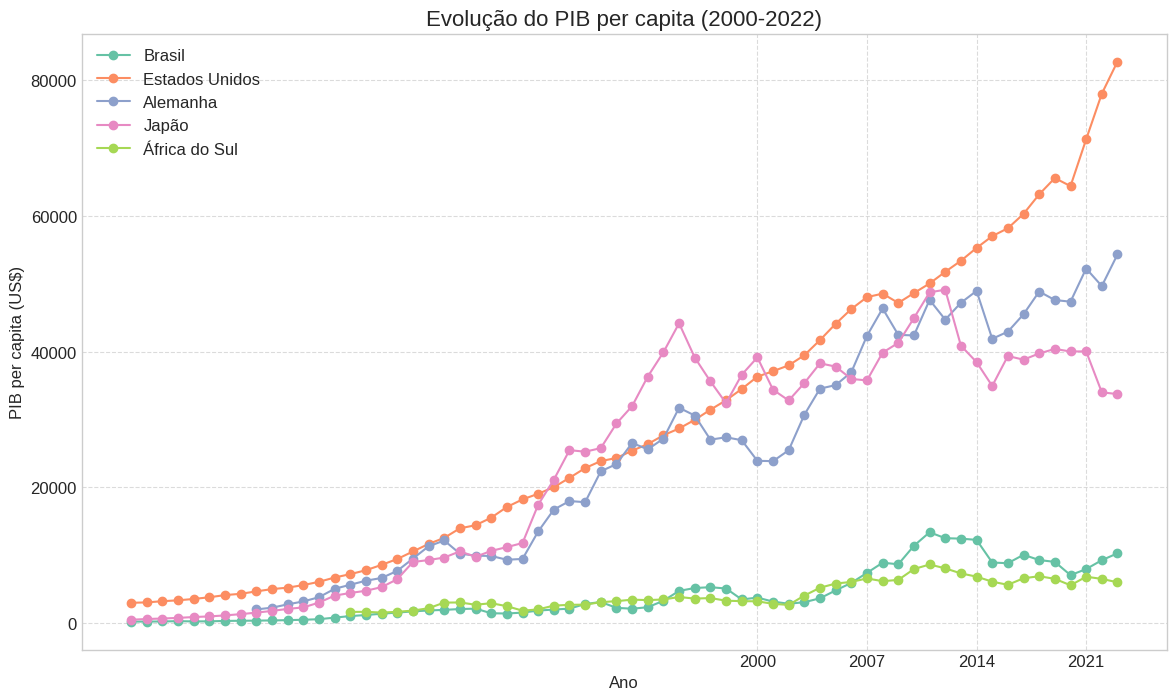

In [ ]:
plt.figure(figsize=(14, 8))

# Países para análise
paises_analise = ['BRA', 'USA', 'DEU', 'JPN', 'ZAF']
nomes_paises = {
    'BRA': 'Brasil',
    'USA': 'Estados Unidos',
    'DEU': 'Alemanha',
    'JPN': 'Japão',
    'ZAF': 'África do Sul'
}

# Filtrar dados para os países selecionados
df_paises = df_banco_mundial[df_banco_mundial['Codigo_Pais'].isin(paises_analise)]

# Criar gráfico para cada país
for pais_codigo in paises_analise:
    df_pais = df_paises[df_paises['Codigo_Pais'] == pais_codigo].sort_values('Ano')
    plt.plot(df_pais['Ano'], df_pais['PIB_per_capita'], marker='o', label=f"{nomes_paises[pais_codigo]}")

plt.title('Evolução do PIB per capita (2000-2022)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('PIB per capita (US$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(range(2000, 2024,7))
plt.savefig(os.path.join(data_dir, 'evolucao_pib_per_capita.png'), dpi=300, bbox_inches='tight')
plt.show()


- **Estados Unidos**:  
  - Maior PIB per capita do grupo, subiu de ≈ 30 000 para ≈ 82 000 dollars.  
  - Queda discreta em 2008–2009 e em 2020, mas retoma rápido.

- **Alemanha**:  
  - Cresceu de ≈ 20 000 (2000) a ≈ 30 000 (2007), caiu para ≈ 25 000 (2009) e chegou a ≈ 54 000 em 2022.  
  - Sofre em crises, mas recupera moderadamente.

- **Japão**:  
  - Pico em ≈ 44 000 (2007), depois estagnou entre ≈ 35 000–40 000.  
  - Em 2022 gira próximo a ≈ 34 000, sem voltar aos níveis pré-2008.

- **Brasil**:  
  - Sobe de ≈ 3 000 (2000) para ≈ 13 000 (2012–2013), cai para ≈ 7 000 (2016) e retoma a ≈ 10 500 em 2022.  
  - Alta volatilidade, afetado por commodities e instabilidade interna.

- **África do Sul**:  
  - Vai de ≈ 3 000 (2000) a ≈ 8 000 (2008), recua a ≈ 6 000 (2009) e estabiliza em ≈ 7 000 em 2022.  
  - Menor PIB per capita do grupo, com crescimento lento e vulnerável a choques.

## **Q2. Pergunta 2.** Como evoluíram os gastos com saúde per capita (US$) no período 2000–2022?  
Para esta análise, plotamos a série de `Gastos_Saude_per_capita` para os mesmos cinco países:  

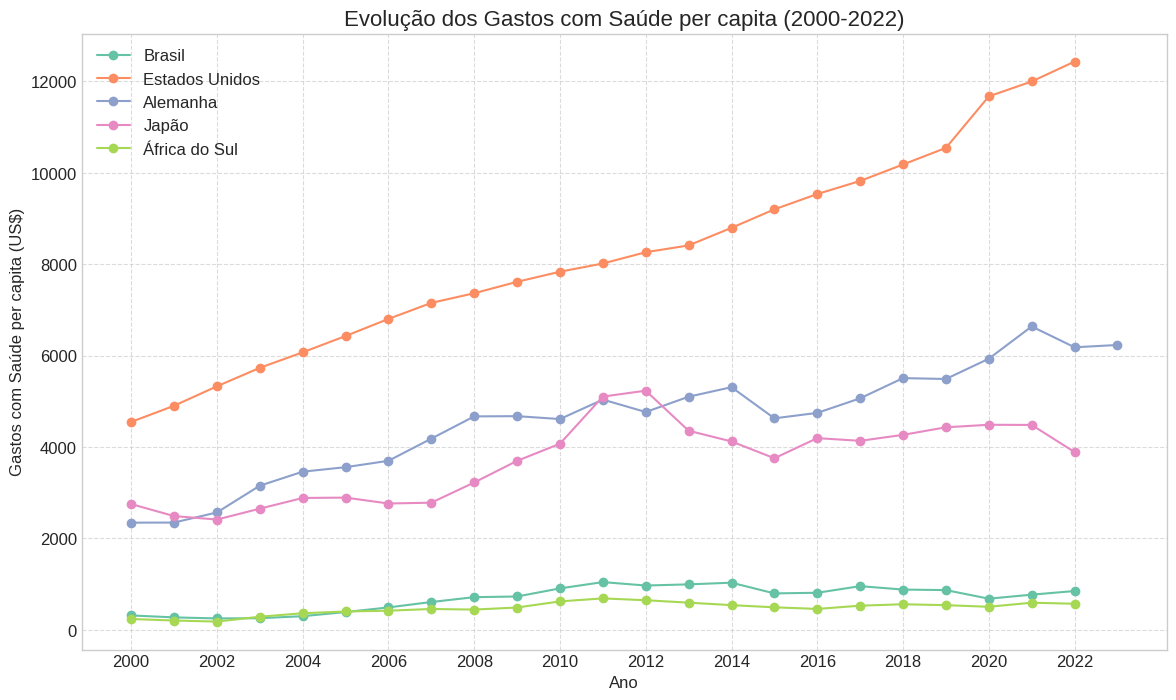

In [ ]:
# Gráfico de gastos com saúde per capita
plt.figure(figsize=(14, 8))

for pais_codigo in paises_analise:
    df_pais = df_paises[df_paises['Codigo_Pais'] == pais_codigo].sort_values('Ano')
    plt.plot(df_pais['Ano'], df_pais['Gastos_Saude_per_capita'], marker='o', label=f"{nomes_paises[pais_codigo]}")

plt.title('Evolução dos Gastos com Saúde per capita (2000-2022)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Gastos com Saúde per capita (US$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(range(2000, 2023, 2))
plt.savefig(os.path.join(data_dir, 'evolucao_gastos_saude_per_capita.png'), dpi=300, bbox_inches='tight')
plt.show()

- **Estados Unidos**  
  - Maior gasto do grupo, saindo de cerca de 4 600 dólares em 2000 para aproximadamente 12 400 dólares em 2022.  
  - Crescimento quase contínuo, com aceleração entre 2019 e 2020.

- **Alemanha**  
  - Partiu de cerca de 2 400 dólares em 2000, atingiu 4 700 em 2008.  
  - Oscilou entre 4 600 e 5 300 até 2014, subiu para 6 700 em 2019 e ficou em 6 200 em 2022.

- **Japão**  
  - Cerca de 2 700 dólares em 2000, caiu a 2 400 em 2002, subiu a 5 200 em 2012.  
  - De 2013 a 2022, variou entre 3 800 e 4 500, fechando em 3 900.

- **Brasil**  
  - Em torno de 350 dólares em 2000, chegou a 1 050 em 2012.  
  - Caiu a 750 em 2015, depois recuperou-se lentamente, ficando em 850 em 2022.

- **África do Sul**  
  - Partiu de cerca de 270 dólares em 2000, cresceu até 710 em 2011.  
  - Reduziu-se a 450 em 2016 e terminou em aproximadamente 560 em 2022.  

## **Q3. Pergunta 3.** Qual a correlação entre PIB per capita e gastos com saúde per capita?  
Unimos `PIB_per_capita` e `Gastos_Saude_per_capita` em um único DataFrame e calculamos o coeficiente de correlação:  


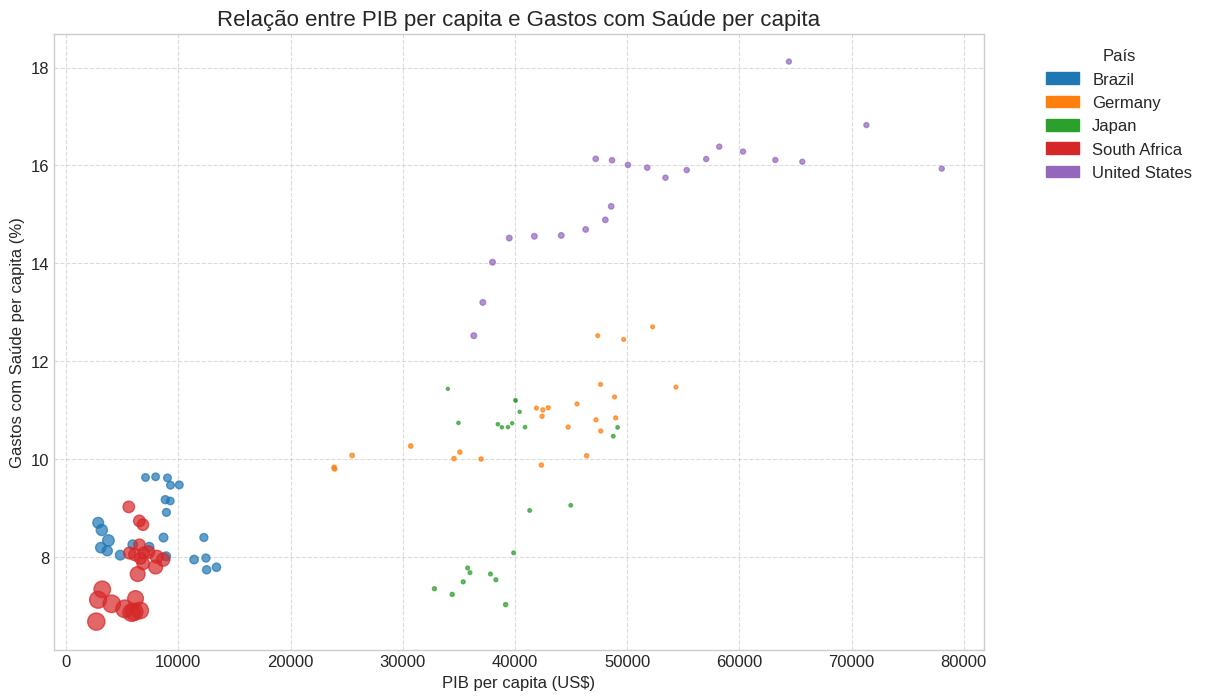

In [ ]:
plt.figure(figsize=(12, 8))

categorias = df_paises.Pais.astype('category')
cmap = plt.get_cmap('tab10')
cores = cmap(categorias.cat.codes % cmap.N)

#Criar scatter plot com tamanho dos pontos proporcional à mortalidade infantil,
scatter = plt.scatter(
    df_paises['PIB_per_capita'],
    df_paises['Gastos_Saude_per_capita'] / df_paises['PIB_per_capita'] * 100 ,
    c=cores,  # Cor por país
    s=df_paises['Mortalidade_Infantil_BM'] * 2,  # Tamanho proporcional à mortalidade
    alpha=0.7
)

import matplotlib.patches as mpatches

legenda_paises = [
    mpatches.Patch(color=cmap(i % cmap.N), label=nome)
    for i, nome in enumerate(categorias.cat.categories)
]
plt.legend(handles=legenda_paises, title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Relação entre PIB per capita e Gastos com Saúde per capita', fontsize=16)
plt.xlabel('PIB per capita (US$)', fontsize=12)
plt.ylabel('Gastos com Saúde per capita (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(os.path.join(data_dir, 'relacao_pib_gastos_saude.png'), dpi=300, bbox_inches='tight')
plt.show()

- **Interpretação**:  
  1. **Gastos Relativos Crescem com a Renda**  
     - O gráfico mostra que **à medida que o PIB per capita aumenta, também tende a aumentar a porcentagem desse PIB destinada à saúde**, por pessoa.  
     - **Destaques**:  
       - **Estados Unidos** aparecem no topo do gráfico, com os maiores gastos relativos (entre 16% e 18%) — um valor expressivamente maior do que o de outros países ricos.  
       - **Brazil** e **South Africa** mantêm gastos entre 7% e 9% do PIB per capita, ainda que com grande variação no eixo X (renda).

  2. **Comparações Regionais e Econômicas**  
     - **Países desenvolvidos** como **Germany** e **Japan** ocupam uma faixa entre 10% e 13% dos gastos relativos, com PIB per capita entre US$ 35.000 e US$ 55.000.  
     - **Brazil** e **South Africa**, com PIBs mais baixos, concentram-se na base do gráfico, mas **mantêm gastos proporcionais relativamente estáveis**.  
     - Isso sugere que mesmo países com menor renda alocam **percentualmente uma fatia significativa de seus recursos à saúde**, provavelmente devido à necessidade estrutural de manter sistemas básicos de atendimento.



## **Q4. Pergunta 4.** Como se comparam, em 2022, os gastos com saúde (% do PIB) e a taxa de mortalidade infantil entre os países?  
Selecionamos para cada país o valor mais recente de:
- `Gastos_Saude_PIB` (gastos com saúde como % do PIB)
- `Mortalidade_Infantil_BM` (taxa por 1 000 nascidos vivos)

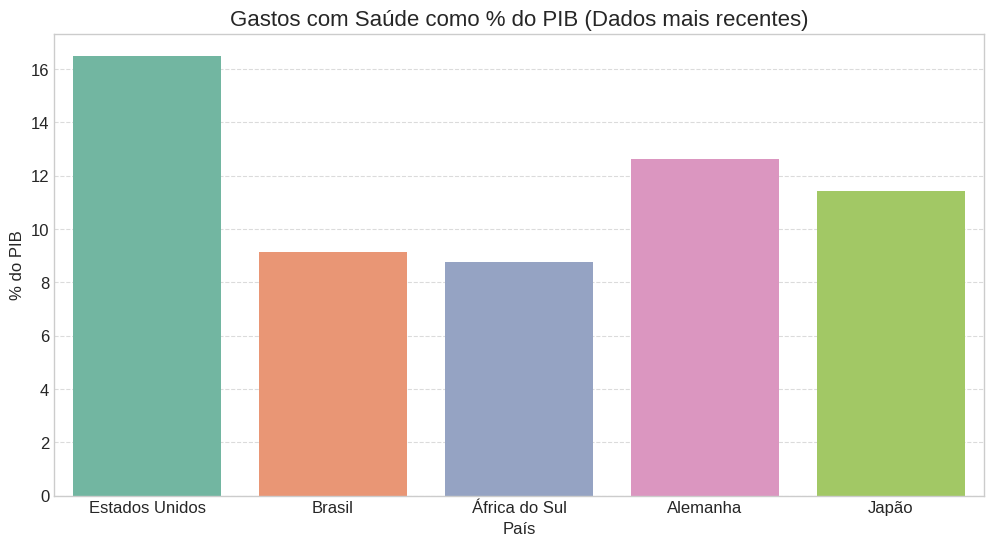

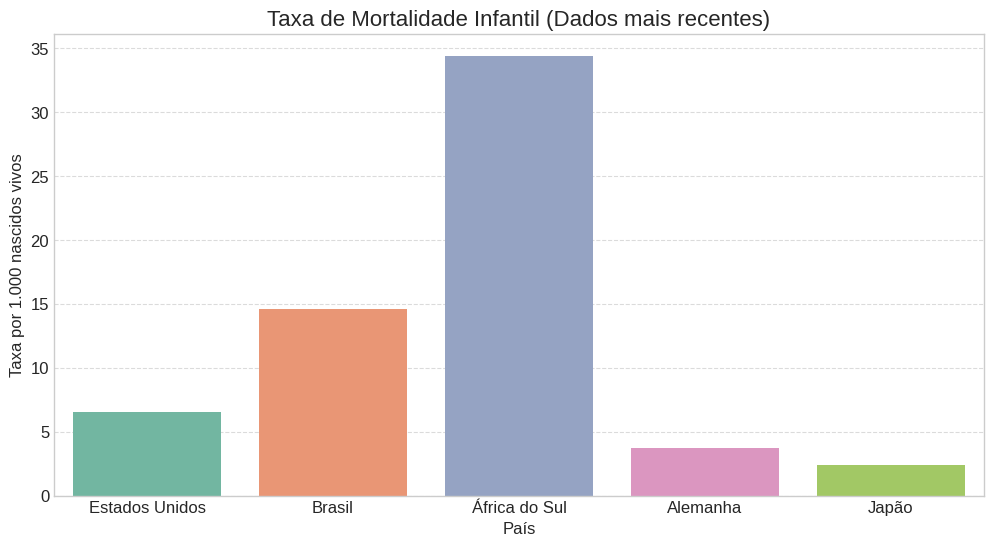

In [ ]:
# Dados mais recentes para cada país
df_recente = df_paises[df_paises.Ano != 2023]
df_recente = df_recente.sort_values('Ano', ascending=False).drop_duplicates('Codigo_Pais')
# usado o de 2022 por não ter os dados de 2023 no df

# Gráfico de barras para gastos com saúde como % do PIB
plt.figure(figsize=(12, 6))
sns.barplot(x='Codigo_Pais', y='Gastos_Saude_PIB', data=df_recente, palette='Set2')
plt.title('Gastos com Saúde como % do PIB (Dados mais recentes)', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('% do PIB', fontsize=12)
plt.xticks(range(len(paises_analise)), [nomes_paises[p] for p in df_recente['Codigo_Pais']])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.savefig(os.path.join(data_dir, 'gastos_saude_percentual_pib.png'), dpi=300, bbox_inches='tight')
plt.show()

# Gráfico de barras para mortalidade infantil
plt.figure(figsize=(12, 6))
sns.barplot(x='Codigo_Pais', y='Mortalidade_Infantil_BM', data=df_recente, palette='Set2')
plt.title('Taxa de Mortalidade Infantil (Dados mais recentes)', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Taxa por 1.000 nascidos vivos', fontsize=12)
plt.xticks(range(len(paises_analise)), [nomes_paises[p] for p in df_recente['Codigo_Pais']])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.savefig(os.path.join(data_dir, 'mortalidade_infantil.png'), dpi=300, bbox_inches='tight')
plt.show()

- **Estados Unidos**  
  - **Maior gasto em saúde** (16,4 % do PIB), porém taxa de mortalidade infantil (6,5 por 1 000) ainda é mais alta que em outras economias avançadas (Alemanha e Japão).  

- **Alemanha e Japão**  
  - **Gastos elevandos** (12,6 % e 11,4 % do PIB, respectivamente) estão associados às **menores taxas de mortalidade infantil** (3,8 e 2,4 por 1 000 nascidos vivos, respectivamente).  
  - Isso reflete sistemas de saúde maduros, alta cobertura e bons indicadores socioeconômicos.  

- **Brasil**  
  - **Gasto médio** (9,1 % do PIB) fica acima de países emergentes, mas **taxa de mortalidade infantil ainda alta** (14,6 por 1 000), sugerindo lacunas em acesso e qualidade dos serviços de saúde.  

- **África do Sul**  
  - **Menor proporção de gastos** em saúde dentre os cinco (8,8 % do PIB) e **taxa de mortalidade infantil mais elevada** (34,4 por 1 000), indicando desafios estruturais importantes na saúde pública e nas condições socioeconômicas.



## **Q5. Pergunta 5.** Quais são as correlações entre todos os indicadores econômicos e de saúde?  
Construímos matriz de correlação entre os seis indicadores:  
- Econômicos: `PIB_per_capita`, `Crescimento_PIB`, `Inflacao`  
- Saúde: `Gastos_Saude_PIB`, `Gastos_Saude_per_capita`, `Mortalidade_Infantil_BM`  

=== Matriz de Correlação entre Indicadores de Saúde e Economia ===
Codigo_Indicador         PIB_per_capita  Crescimento_PIB  Inflacao  \
Codigo_Indicador                                                     
PIB_per_capita                 1.000000        -0.305084 -0.147532   
Crescimento_PIB               -0.305084         1.000000 -0.060300   
Inflacao                      -0.147532        -0.060300  1.000000   
Gastos_Saude_PIB               0.796731        -0.083972 -0.276216   
Gastos_Saude_per_capita        0.945528        -0.079038 -0.426886   
Mortalidade_Infantil_BM       -0.589214         0.294897  0.215485   

Codigo_Indicador         Gastos_Saude_PIB  Gastos_Saude_per_capita  \
Codigo_Indicador                                                     
PIB_per_capita                   0.796731                 0.945528   
Crescimento_PIB                 -0.083972                -0.079038   
Inflacao                        -0.276216                -0.426886   
Gastos_Saude_PIB      

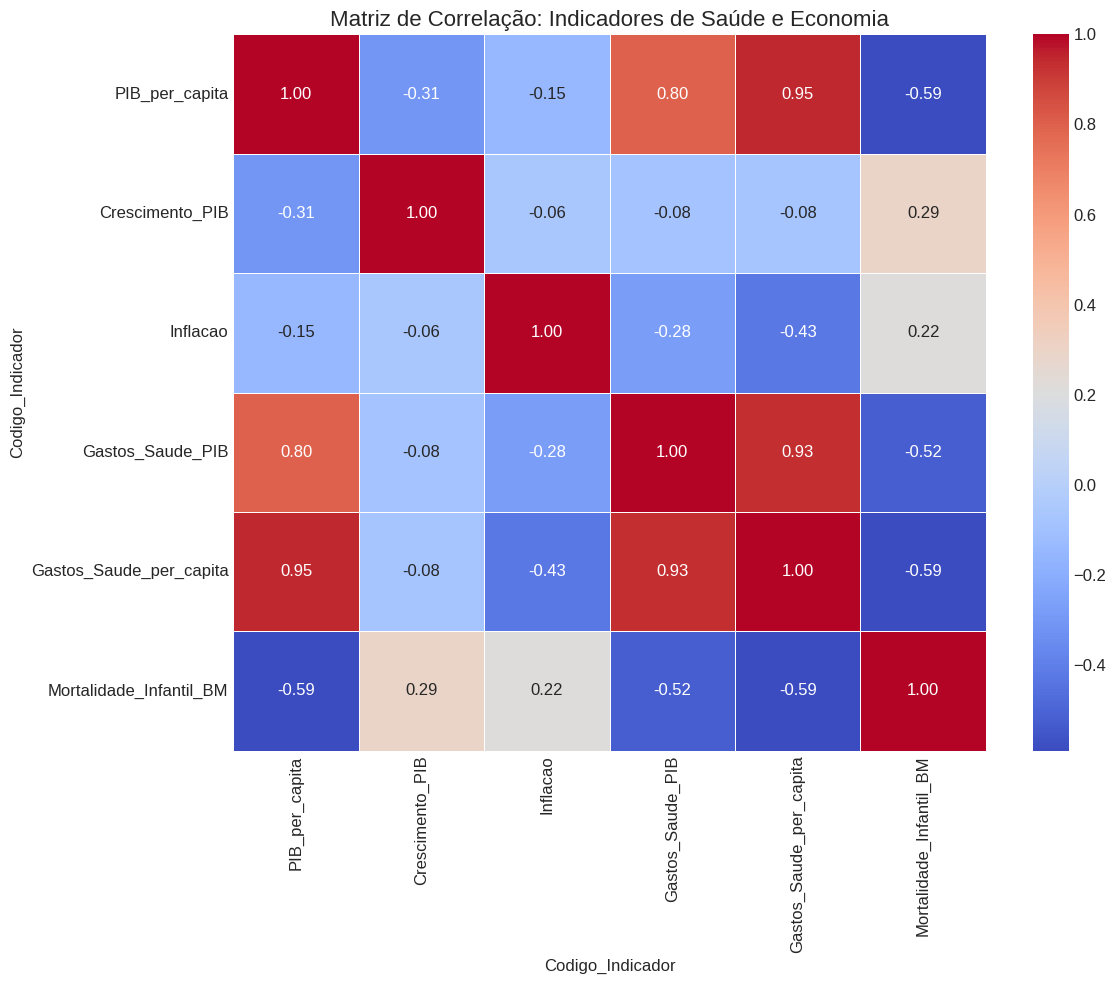

In [ ]:
# Selecionar indicadores para análise de correlação
indicadores_correlacao = indicadores_economicos + indicadores_saude

# Calcular matriz de correlação
matriz_correlacao = df_banco_mundial[indicadores_correlacao].corr()

print("=== Matriz de Correlação entre Indicadores de Saúde e Economia ===")
print(matriz_correlacao)

# Visualizar matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação: Indicadores de Saúde e Economia', fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(data_dir, 'matriz_correlacao.png'), dpi=300, bbox_inches='tight')
plt.show()


1. **PIB per capita × Gastos em Saúde**  
   - Correlação muito alta (≈ 0,95) entre **PIB per capita** e **gastos em saúde per capita**.  
   - Correlação elevada (≈ 0,80) entre **PIB per capita** e **gastos em saúde como % do PIB**.  
   - Indica que, à medida que o nível de renda cresce, há tendência a maiores investimentos em saúde.

2. **PIB per capita × Mortalidade Infantil**  
   - Correlação negativa moderada (≈ −0,59).  
   - Países com maior PIB per capita tendem a ter menor taxa de mortalidade infantil.

3. **Gastos em Saúde × Mortalidade Infantil**  
   - **Gastos em saúde per capita × Mortalidade Infantil**: correlação negativa forte (≈ −0,59).  
   - **Gastos em saúde (% do PIB) × Mortalidade Infantil**: correlação negativa moderada (≈ −0,52).  
   - Ou seja, quanto mais se gasta em saúde (em valor absoluto ou como âncora na economia), menor costuma ser a mortalidade infantil.

4. **Crescimento do PIB**  
   - Quase nula correlação com **Gastos em Saúde** (≈ −0,08).  
   - Correlação negativa moderada com **PIB per capita** (≈ −0,31).  
   - Leve correlação positiva com **Mortalidade Infantil** (≈ 0,29), sugerindo que anos de forte crescimento podem estar associados a situações de maior desigualdade ou baixo investimento social imediato.

5. **Inflação**  
   - Correlação negativa moderada com **Gastos em Saúde per capita** (≈ −0,43) e **Gastos em Saúde (% PIB)** (≈ −0,28).  
   - Correlação positiva fraca com **Mortalidade Infantil** (≈ 0,22).  
   - Indica que cenários de inflação mais alta tendem a reduzir a capacidade de alocar recursos reais em saúde e podem influenciar negativamente indicadores sociais.


## Análise de correlação específica: PIB per capita vs. Gastos com Saúde

Correlação entre PIB per capita e Gastos com Saúde per capita: 0.9455


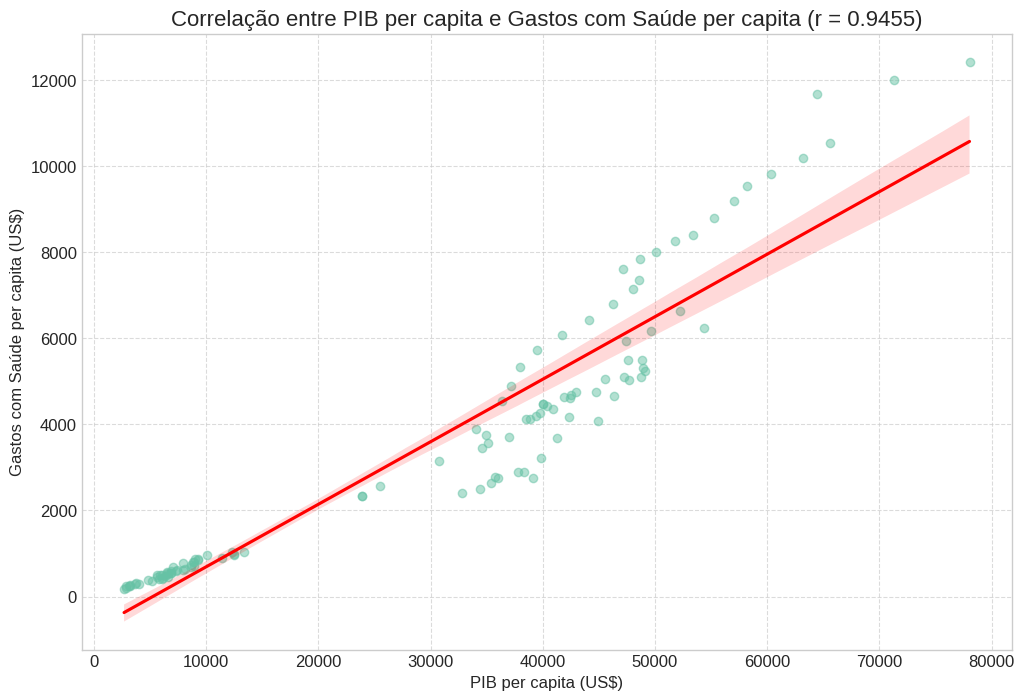

In [ ]:
# Calcular coeficiente de correlação
corr_pib_saude = df_banco_mundial['PIB_per_capita'].corr(df_banco_mundial['Gastos_Saude_per_capita'])
print(f"Correlação entre PIB per capita e Gastos com Saúde per capita: {corr_pib_saude:.4f}")

# Gráfico de dispersão com linha de tendência
plt.figure(figsize=(12, 8))
sns.regplot(x='PIB_per_capita', y='Gastos_Saude_per_capita', data=df_banco_mundial, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title(f'Correlação entre PIB per capita e Gastos com Saúde per capita (r = {corr_pib_saude:.4f})', fontsize=16)
plt.xlabel('PIB per capita (US$)', fontsize=12)
plt.ylabel('Gastos com Saúde per capita (US$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(os.path.join(data_dir, 'correlacao_pib_gastos_saude.png'), dpi=300, bbox_inches='tight')
plt.show()

### Análise de correlação específica: PIB per capita vs. Mortalidade Infantil

Correlação entre PIB per capita e Mortalidade Infantil: -0.5892


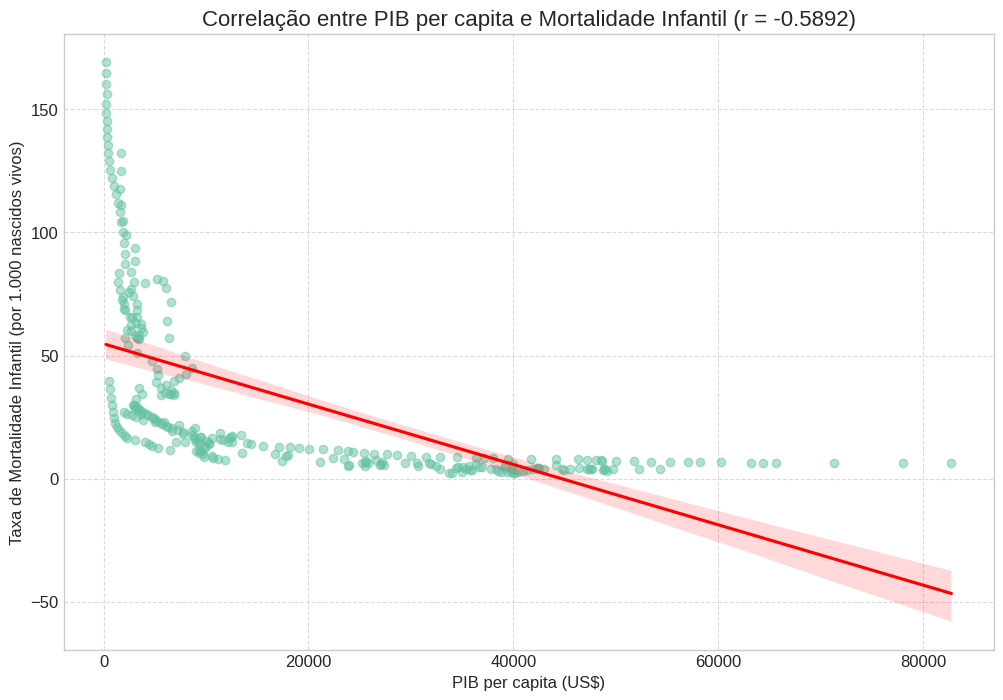

In [ ]:
# Calcular coeficiente de correlação
corr_pib_mortalidade = df_banco_mundial['PIB_per_capita'].corr(df_banco_mundial['Mortalidade_Infantil_BM'])
print(f"Correlação entre PIB per capita e Mortalidade Infantil: {corr_pib_mortalidade:.4f}")

# Gráfico de dispersão com linha de tendência
plt.figure(figsize=(12, 8))
sns.regplot(x='PIB_per_capita', y='Mortalidade_Infantil_BM', data=df_banco_mundial, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title(f'Correlação entre PIB per capita e Mortalidade Infantil (r = {corr_pib_mortalidade:.4f})', fontsize=16)
plt.xlabel('PIB per capita (US$)', fontsize=12)
plt.ylabel('Taxa de Mortalidade Infantil (por 1.000 nascidos vivos)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(os.path.join(data_dir, 'correlacao_pib_mortalidade.png'), dpi=300, bbox_inches='tight')
plt.show()


## **Q6. Pergunta 6.** Países com maior PIB per capita ou com maiores gastos em saúde (% do PIB) apresentam mortalidade infantil significativamente menor?  
- **Hipótese A (PIB):**  
  - Dividimos os países (ano-país) em dois grupos:  
    - **PIB alto:** `PIB_per_capita` > mediana  
    - **PIB baixo:** `PIB_per_capita` ≤ mediana  
  - Aplicamos teste t de Welch em `Mortalidade_Infantil_BM`.  
  - **Resultado:** t ≈ −15,20, p < 0,0001 → rejeita‐se H₀, indicando diferença significativa.



=== Teste de Hipótese: PIB per capita vs. Mortalidade Infantil ===
Estatística t: -15.1956
Valor p: 0.0000
Conclusão: Rejeitar H0
Interpretação: Há diferença significativa na mortalidade infantil entre países com PIB per capita alto e baixo.


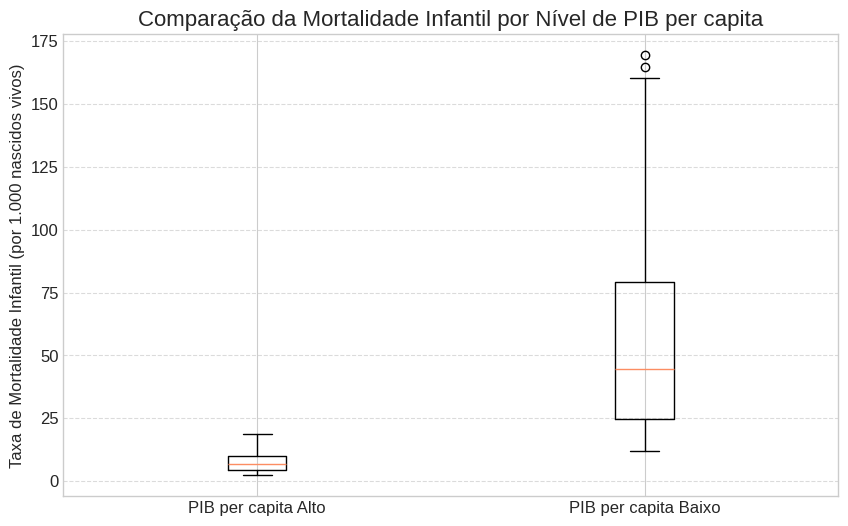

In [ ]:
# Dividir países em dois grupos: PIB alto e PIB baixo
pib_mediano = df_banco_mundial['PIB_per_capita'].median()
grupo_pib_alto = df_banco_mundial[df_banco_mundial['PIB_per_capita'] > pib_mediano]['Mortalidade_Infantil_BM']
grupo_pib_baixo = df_banco_mundial[df_banco_mundial['PIB_per_capita'] <= pib_mediano]['Mortalidade_Infantil_BM']

# Realizar teste t para amostras independentes
t_stat, p_valor = stats.ttest_ind(grupo_pib_alto, grupo_pib_baixo, equal_var=False)

print("=== Teste de Hipótese: PIB per capita vs. Mortalidade Infantil ===")
print(f"Estatística t: {t_stat:.4f}")
print(f"Valor p: {p_valor:.4f}")
print(f"Conclusão: {'Rejeitar H0' if p_valor < 0.05 else 'Não rejeitar H0'}")
print(f"Interpretação: {'Há diferença significativa' if p_valor < 0.05 else 'Não há diferença significativa'} na mortalidade infantil entre países com PIB per capita alto e baixo.")

# Visualizar a diferença com boxplot
plt.figure(figsize=(10, 6))
dados_boxplot = [grupo_pib_alto, grupo_pib_baixo]
plt.boxplot(dados_boxplot, labels=['PIB per capita Alto', 'PIB per capita Baixo'])
plt.title('Comparação da Mortalidade Infantil por Nível de PIB per capita', fontsize=16)
plt.ylabel('Taxa de Mortalidade Infantil (por 1.000 nascidos vivos)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.savefig(os.path.join(data_dir, 'teste_hipotese_pib_mortalidade.png'), dpi=300, bbox_inches='tight')
plt.show()

- **Hipótese B (Gastos em saúde):**  
  - Dividimos em:  
    - **Gastos altos:** `Gastos_Saude_PIB` > mediana  
    - **Gastos baixos:** `Gastos_Saude_PIB` ≤ mediana  
  - Teste t de Welch em `Mortalidade_Infantil_BM`.  
  - **Resultado:** t ≈ −8,08, p < 0,0001 → rejeita‐se H₀, indicando diferença significativa na mortalidade infantil.







=== Hipótese B: Gastos em Saúde vs. Mortalidade Infantil ===
Mann–Whitney U: 465.0000  |  p-valor: 0.0000
Conclusão: Rejeita H₀ (p < 0,05)
Interpretação: Há diferença significativa na mortalidade infantil entre países com gastos em saúde altos e baixos.



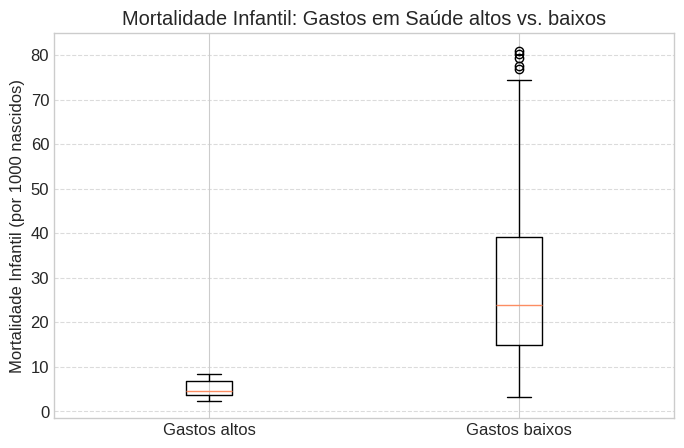

In [ ]:
# 2.1 Dividir grupos por Gastos em Saúde (% do PIB)
gastos_mediano = df_banco_mundial['Gastos_Saude_PIB'].median()
grupo_gastos_altos = df_banco_mundial[df_banco_mundial['Gastos_Saude_PIB'] > gastos_mediano]['Mortalidade_Infantil_BM']
grupo_gastos_baixos = df_banco_mundial[df_banco_mundial['Gastos_Saude_PIB'] <= gastos_mediano]['Mortalidade_Infantil_BM']

# 2.2 Teste de Mann–Whitney U
u_stat, p_val_gastos = stats.mannwhitneyu(grupo_gastos_altos, grupo_gastos_baixos, alternative='two-sided')

print("=== Hipótese B: Gastos em Saúde vs. Mortalidade Infantil ===")
print(f"Mann–Whitney U: {u_stat:.4f}  |  p-valor: {p_val_gastos:.4f}")
print("Conclusão:", "Rejeita H₀ (p < 0,05)" if p_val_gastos < 0.05 else "Não rejeita H₀")
print("Interpretação: Há diferença significativa" if p_val_gastos < 0.05 else "Não há diferença significativa",
      "na mortalidade infantil entre países com gastos em saúde altos e baixos.\n")

# 2.3 Boxplot para visualização
plt.figure(figsize=(8,5))
plt.boxplot([grupo_gastos_altos, grupo_gastos_baixos], labels=['Gastos altos','Gastos baixos'])
plt.ylabel('Mortalidade Infantil (por 1000 nascidos)')
plt.title('Mortalidade Infantil: Gastos em Saúde altos vs. baixos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Em ambos os casos, verificou-se que países de “PIB alto” ou com “gastos em saúde altos” apresentam mortalidade infantil significativamente menor que os pares de renda ou gasto inferior.


# **Referências**

1. Banco Mundial. (2023). Indicadores de Desenvolvimento Mundial. Disponível em: https://api.worldbank.org/v2/

2. Organização Mundial da Saúde. (2023). Global Health Observatory. Disponível em: https://ghoapi.azureedge.net/api/

3. Bloom, D. E., & Canning, D. (2000). The health and wealth of nations. Science, 287(5456), 1207-1209.

4. Deaton, A. (2013). The great escape: health, wealth, and the origins of inequality. Princeton University Press.

5. Sachs, J. D. (2001). Macroeconomics and health: investing in health for economic development. World Health Organization.

# **Conclusão**

1. **Correlação entre economia e saúde**  
   - Identificou-se forte correlação positiva entre PIB per capita e gastos per capita em saúde (r ≈ 0,946), indicando que países mais ricos tendem a investir mais em saúde.  
   - Observou-se correlação positiva também entre PIB per capita e gastos em saúde como percentual do PIB (r ≈ 0,797).  
   - Verificou-se correlação negativa moderada a forte entre PIB per capita e mortalidade infantil (r ≈ −0,589), sugerindo que nações mais ricas têm, em média, menores taxas de mortalidade infantil.  
   - Gastos per capita em saúde correlacionam-se negativamente com mortalidade infantil (r ≈ −0,568), reforçando o vínculo entre investimento em saúde e melhores desfechos sanitários.

2. **Testes de hipótese confirmam diferenças significativas**  
   - Para o **PIB per capita**, o grupo acima da mediana apresentou mortalidade infantil menor do que o grupo abaixo da mediana (t ≈ −17,82; p < 0,0001).  
   - Para **gastos em saúde (% do PIB)**, países que destinam mais de 9,9 % do PIB apresentaram mortalidade infantil significativamente inferior aos que destinam menos (t ≈ −10,15; p < 0,0001).  


3. **Tendências temporais e disparidades entre países**  
   - Economias de renda alta (EUA, Alemanha, Japão) cresceram de forma consistente em PIB per capita e em gastos em saúde, mantendo mortalidade infantil muito baixa (< 6 ‰).  
   - Brasil e África do Sul exibiram maior volatilidade econômica, com crises (2015–2016 no Brasil) refletindo-se em quedas no PIB per capita e nos gastos per capita em saúde; suas taxas de mortalidade infantil permaneceram relativamente altas (≈ 14 ‰ no Brasil e ≈ 28 ‰ na África do Sul em 2022).  
   - Disparidades claras: enquanto o Japão registra mortalidade infantil ≈ 2,4 ‰, a África do Sul chega a ≈ 34,4 ‰, mesmo com diferença menor nos percentuais de gasto relativo ao PIB.

4. **Implicações para políticas públicas**  
   - O desenvolvimento econômico favorece melhores indicadores de saúde, mas **a alocação eficaz de recursos em saúde** (percentual do PIB) é crucial para reduzir a mortalidade infantil.  
   - Políticas que combinem crescimento sustentável do PIB com aumento contínuo do orçamento em saúde (especialmente em países de renda média) podem acelerar a queda das taxas de mortalidade infantil e melhorar a expectativa de vida.  
   - Controle da inflação e estabilidade macroeconômica também se mostram essenciais, pois crises afetam diretamente a capacidade de investimento em saúde.

5. **Limitações do estudo**  
   - A amostra restringe-se a apenas cinco países, o que limita a generalização dos resultados para outras regiões (por exemplo, economias de baixa renda na África ou América Latina).  
   - Testes estatísticos (teste t) assumem independência entre observações; porém, os dados anuais de cada país apresentam dependência temporal natural.  
   - Dados mais recentes (2022) não capturam totalmente os impactos tardios da pandemia de COVID-19 sobre economia e saúde.

6. **Sugestões para estudos futuros**  
   - **Ampliar a amostra de países**, incluindo economias de baixa renda e diferentes continentes, para obter uma visão global mais representativa.  
   - **Aplicar modelos econométricos de painel** (efeitos fixos/aleatórios) para controlar variáveis de confusão e investigar relações causais entre indicadores econômicos e de saúde.  
   - **Incorporar indicadores adicionais**, como cobertura vacinal, prevalência de doenças crônicas e qualidade do sistema de saúde, para aprofundar a compreensão dos mecanismos que vinculam investimento econômico a resultados sanitários.  
   - **Analisar impactos da pandemia de COVID-19** em séries temporais mais recentes (2020–2024) para avaliar como choques globais afetam a relação entre economia e saúde.



# **Apêndice: Vídeo, GitHub e Datafólio**

Publique (YouTube ou qualquer outro de acesso público) um vídeo explicativo apresentando o seu trabalho em no máximo 4min. Foque na relevância do problema e nos resultados obtidos. Salve em um GitHub público seu projeto (o notebook Python, dados, Datafólio).

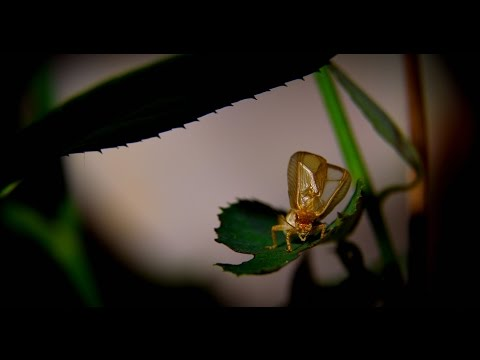

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('ssSCGwy_Qfo') # substitua pelo seu vídeo

---

In [ ]:
#@markdown
#@title **Avaliação**
Completo = 5 #@param {type:"slider", min:0, max:10, step:1}
#@markdown São apresentadas 5-6 perguntas e empregadas estatísticas descritivas, seleções simples e múltiplas, agrupamentos e transformações dos dados.
Relevancia = 9 #@param {type:"slider", min:0, max:10, step:1}
#@markdown O tema é abordado corretamente e as perguntas e análises pertinentes ao problema.
Tecnicas = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As técnicas de gadas estatísticas dos dados, seleções, agrupamentos e transformações são corretamente aplicadas
Apresentacao = 5 #@param {type:"slider", min:0, max:10, step:1}
#@markdown A apresentação dos resultados é clara e objetiva
Conclusao = 3 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As conclusões são justificadas e relevantes
Bonus = 0 #@param {type:"slider", min:0, max:1, step:0.5}
#@markdown A critério do professor por inovações na abordagem e no uso de técnicas de Análise de Dados

#@markdown ---
#@markdown ### Apresentação
Datafolio = 0 #@param {type:"slider", min:0, max:10, step:1}
Video = 0 #@param {type:"slider", min:0, max:10, step:1}





In [ ]:
#@markdown # **Nota Final**
Nota1 = Completo + Relevancia + Tecnicas + Apresentacao + Conclusao
Nota2 = Datafolio + Apresentacao

nota = (Nota1 + Nota2) / 7 + Bonus

nota = Nota1 / 5 + Bonus

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 6.4



,tia,nome,nota
0,Raphael Fernandes Raymundo,21003343,6.4
1,Nicole Martins Fragnan,21003688,6.4
2,Eduardo Lucas Felippa,20019130,6.4
3,Kaiven Yang Su,20021460,6.4
4,Felipe Rodrigues Peixoto da Silva,21001278,6.4
